# AlexNet-Inspired Model for Fashion MNIST

This guide outlines each step involved in adapting the AlexNet architecture to the Fashion MNIST dataset. Adjustments are made to accommodate the smaller, grayscale input images.

---

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

> **Dataset:** Fashion MNIST, consisting of 28x28 grayscale images in 10 classes.

> **Normalization:** Images are divided by 255.0 to scale pixel values between 0 and 1.

> **Reshaping:** Reshapes each image to (28, 28, 1) to fit the input format expected by the model.

In [3]:
# Load and preprocess the Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28, 28, 1) / 255.0, x_test.reshape(-1, 28, 28, 1) / 255.0  # Normalize and reshape

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


### Explanation of AlexNet Architecture Adjustments

1. Input Size: AlexNet typically uses a larger input size (224x224x3). Since Fashion MNIST is grayscale and 28x28, we adapt the input shape to (28, 28, 1).

2. Convolutional Layers: The architecture includes five convolutional layers, which are common in AlexNet. We use fewer filters in the initial layer due to the smaller input size.

3. Max Pooling Layers: The model includes max-pooling layers after certain convolutional layers to reduce spatial dimensions.

4. Dense Layers: AlexNet’s fully connected layers with 4096 units are retained, followed by Dropout layers to reduce overfitting.

5. Output Layer: The output layer is a dense layer with 10 units, corresponding to the 10 classes in Fashion MNIST, with a softmax activation.

### The AlexNet-Inspired Model

In [6]:
# Define the AlexNet-inspired model
model = Sequential([
    Conv2D(96, (3, 3), strides=1, activation='relu', input_shape=(28, 28, 1), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(384, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    Conv2D(384, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Layers:
>  1) **Conv2D Layers:** Five convolutional layers with ReLU activations.
>  2) Adapted from AlexNet to work on smaller 28x28 grayscale images.
>  3) **Batch Normalization:** Normalizes outputs to improve training stability and speed.
>  4) **MaxPooling2D:** Reduces spatial dimensions after certain layers to reduce computational load and control overfitting.
>  5) **Flatten:** Flattens the 3D output to a 1D vector for fully connected layers.
>  6) **Dense Layers:** Two fully connected layers with 4096 units each, and ReLU activations.
>  7) **Dropout Layers:** Dropout layers with 50% probability to prevent overfitting.
>  8) **Output Layer:** A dense layer with 10 units (one for each class) and softmax activation.


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 96)     │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 7, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     9,441,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,589,066 (112.87 MB)

 Trainable params: 29,586,314 (112.86 MB)

 Non-trainable params: 2,752 (10.75 KB)

D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


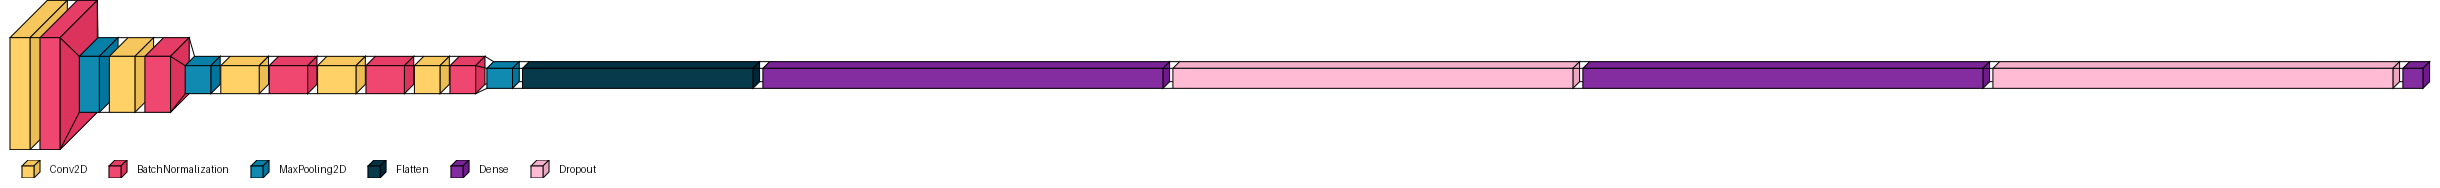

In [10]:
import visualkeras
from visualkeras import layered_view
# Visualizing model architecture
layered_view(model, legend = True)

In [10]:
# Train the model
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 248s 523ms/step - accuracy: 0.7093 - loss: 1.3096 - val_accuracy: 0.5818 - val_loss: 1.3177
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 249s 531ms/step - accuracy: 0.8768 - loss: 0.3451 - val_accuracy: 0.8914 - val_loss: 0.2984
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 239s 510ms/step - accuracy: 0.9052 - loss: 0.2693 - val_accuracy: 0.9047 - val_loss: 0.2834
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 237s 506ms/step - accuracy: 0.9176 - loss: 0.2324 - val_accuracy: 0.8495 - val_loss: 0.3781
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 243s 518ms/step - accuracy: 0.9184 - loss: 0.2311 - val_accuracy: 0.9080 - val_loss: 0.2660
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 231s 492ms/step - accuracy: 0.9275 - loss: 0.2022 - val_accuracy: 0.9023 - val_loss: 0.2928
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 231s 493ms/step - accuracy: 0.9395 - loss: 0.1700 - val_accuracy: 0.9165 - val_loss: 0.2370
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 231s 492ms/step - accuracy: 0.9441 -

In [11]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9244 - loss: 0.3352
Test Accuracy: 0.9256


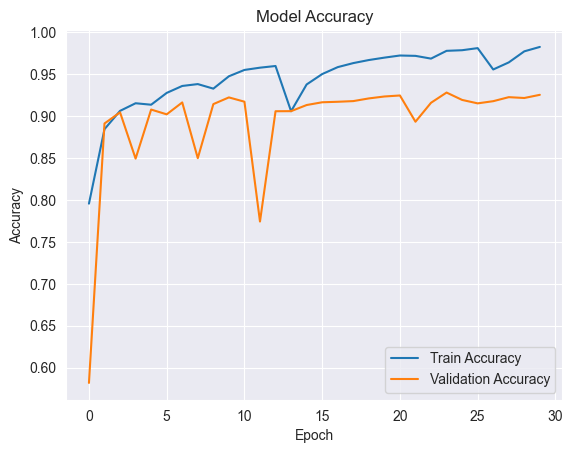

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Loss Function

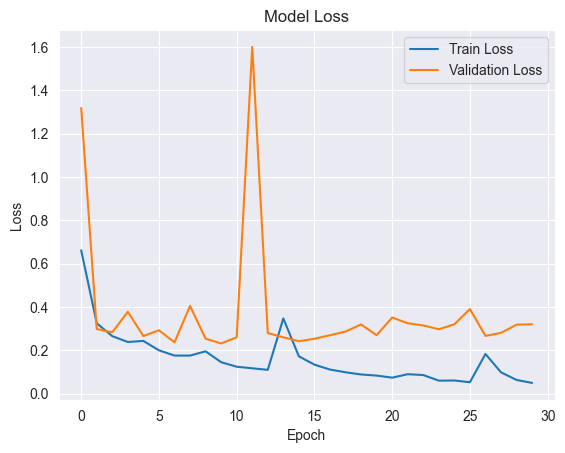

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Save the Model

In [18]:
# Save the model
model.save("alexnet_fashion_mnist.h5")
print("Model saved as alexnet_fashion_mnist.h5")

Model saved as alexnet_fashion_mnist.h5


In [19]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model("alexnet_fashion_mnist.h5")
print("Model loaded successfully.")

Model loaded successfully.


## Generate and Display the Confusion Matrix

After evaluating the model, we can generate a confusion matrix to visualize where the model is making correct and incorrect predictions.
```python

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step


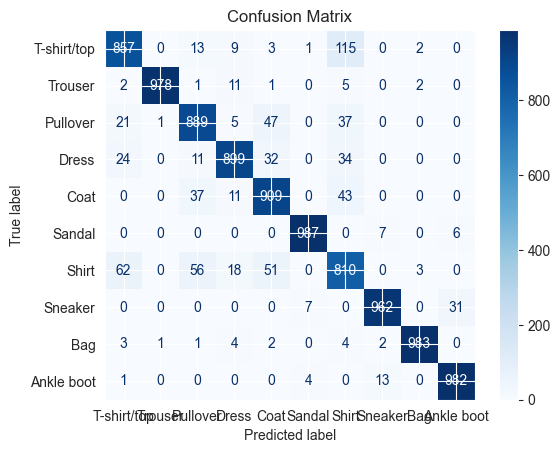

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes on the test set
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test.argmax(axis=1)  # True class labels

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

 ## Plot ROC Curve for Each Class

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step


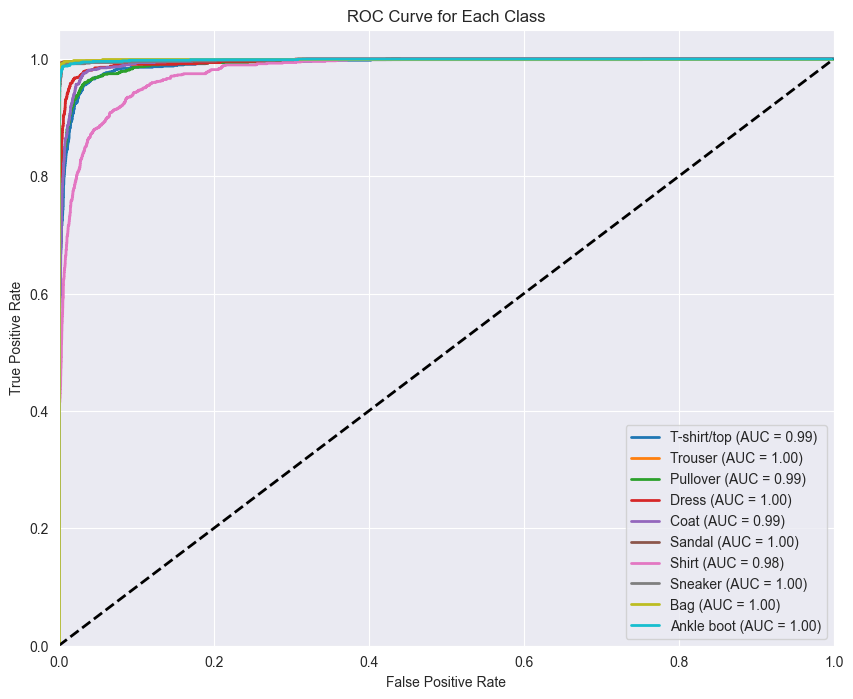

In [21]:
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical

# Convert true labels and predicted probabilities to one-hot encoding
y_test_one_hot = to_categorical(y_test_classes, num_classes=10)
y_pred_proba = model.predict(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(class_names):
    # Calculate ROC curve and AUC for each class
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

### Classification Report

In [22]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions on the test set
y_pred = loaded_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_test_classes = np.argmax(y_test, axis=1)  # True class labels

# Generate classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=class_names)
print("Classification Report:\n")
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step
Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.86      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.88      0.89      0.89      1000
       Dress       0.94      0.90      0.92      1000
        Coat       0.87      0.91      0.89      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.77      0.81      0.79      1000
     Sneaker       0.98      0.96      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.96      0.98      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

